<a href="https://colab.research.google.com/github/Gabxist/Prog_ap/blob/main/Prog_ap_ANALISE_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!rm -r Prog_ap
!git clone https://github.com/Gabxist/Prog_ap.git

rm: cannot remove 'Prog_ap': No such file or directory
Cloning into 'Prog_ap'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 33 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 1.93 MiB | 6.26 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
# importando os arquivos CSV como DataFrame do Pandas
pa_digit = pd.read_csv('/content/Prog_ap/PAs Digitalizados.csv', sep=";",skip_blank_lines=True)
proc_adm = pd.read_csv('/content/Prog_ap/Processos_Administrativos.csv', sep=";",skip_blank_lines=True)
print(pa_digit.columns)
print(proc_adm.columns)

Index(['PA', 'Processo Desenv. PA', 'Processo SEI', 'Código SIPRA',
       'Nome do Titular 1', 'CPF T1', 'VALIDAÇÃO CPF T1', 'Nome do Titular 2',
       'CPF T2', 'VALIDAÇÃO CPF T2', 'Lote/Parcela', 'Município', 'Tipo',
       'Especificação para Inclusão no SEI',
       'Informações para o Termo de Encerramento', 'Nº Folhas',
       'Desconformidades', 'Digitalizador', 'Data da Digitalização',
       'Responsável pela Indexação ao SEI', 'Data da Indexação ao SEI',
       'Observações', 'Link no SEI', 'Situação', 'Responsável Autenticação',
       'Qualidade', 'Origem'],
      dtype='object')
Index(['Processo SEI', 'Nome Outorgado', 'CPF/CNPJ Outorgado',
       'Cônjuge Outorgado', 'CPF Cônjuge', 'Imóvel', 'Gleba/Agrovila/Setor',
       'Lote/Parcela', 'Município', 'Tipo',
       'Especificação para Inclusão no SEI',
       'Informações para o Termo de Encerramento', 'Nº Folhas',
       'Desconformidades', 'Digitalizador', 'Data da Digitalização',
       'Responsável pela Indexação ao

Identificar por exemplo, relação entre tamanho do arquivo (nº de folhas) e data de digitalização / data de indexação
quantidade de processos por responsável Autenticação, etc
Dados relevantes:

Para os dados do arquivo PA digitalizados:

*   Município
*   Nº folhas
*   Digitalizador
*   Data da Digitalização
*   Responsável pela Indexação ao SEI
*   Data da Indexação ao SEI






Para os dados do arquivo Processos Administrativos:

* Município
* Tipo
* Nº folhas
* Digitalizador
* Data da Digitalização
* Responsável pela Indexação ao SEI
* Data da Indexação ao SEI

In [4]:
# se não possui nome do processo, consideramos como processo inexistente.
# removendo as linhas sem informações na coluna PA, do arquivo 'PAs Digitalizados' e
# na coluna 'Processo SEI' do arquivo 'Processos Administrativos'
pa_digit = pa_digit.dropna(subset = ['PA'])
proc_adm = proc_adm.dropna(subset = ['Processo SEI'])

In [70]:
#Substituindo erros nas datas dos arquivos:
pa_digit['Data da Digitalização'] = pa_digit['Data da Digitalização'].replace({'21 e 24/10/2022': 24/10/2024})
pa_digit['Data da Digitalização'] = pa_digit['Data da Digitalização'].replace({'01/01/1970': np.NaN})
pa_digit['Data da Indexação ao SEI'] = pa_digit['Data da Indexação ao SEI'].replace({'DOC AVULSO':np.NaN})
proc_adm['Digitalizador'] = proc_adm['Digitalizador'].replace({'GABRIELA ':'GABRIELA'})
proc_adm['Digitalizador'] = proc_adm['Digitalizador'].replace({'ANDRÉIA':'ANDREIA'})
pa_digit['Digitalizador'] = pa_digit['Digitalizador'].replace({'ADILA ':'ADILA'})
pa_digit['Digitalizador'] = pa_digit['Digitalizador'].replace({'FERNANDA ':'FERNANDA'})
pa_digit['Responsável pela Indexação ao SEI'] = pa_digit['Responsável pela Indexação ao SEI'].replace({'A INDEXAR':np.NaN,'DOC AVULSO':np.NaN,'UAI - CASCAVEL':np.NaN,'FERNANDA ':'FERNANDA'})
pa_digit['Município'] = pa_digit['Município'].replace({'N/C':np.NaN,'RIBEIRAO DO PINHAL/PR':'RIBEIRÃO DO PINHAL/PR', 'SAO JERÔNIMO DA SERRA/PR':'SÃO JERÔNIMO DA SERRA/PR','Guamiranga/PR':'GUAMIRANGA/PR','MANGUEIRINHA/PR ': 'MANGUEIRINHA/PR','Inácio Martins/PR':'INÁCIO MARTINS/PR','CONGONHINHAS':'CONGONHINHAS/PR','CLEVELANDIA/PR':'CLEVELÂNDIA/PR','CASTRO':'CASTRO/PR','CANDOI/PR':'CANDÓI/PR','ALVORADA DO SUL':'ALVORADA DO SUL/PR','TERRA RICA':'TERRA RICA/PR','TURVO':'TURVO/PR','TEIXEIRA SOARES':'TEIXEIRA SOARES/PR','TAMARA':'TAMARANA/PR', 'TAMARANA':'TAMARANA/PR','SAO JOAO DO TRIUNFO/PR':'SÃO JOÃO DO TRIUNFO/PR','SAUDADE DO IGUAÇU/PR':'SAUDADES DO IGUAÇU/PR','SAO GERONIMO DA SERRA ':'SAO JERÔNIMO DA SERRA/PR','SANTANA DO ITARARE':'SANTANA DO ITARARÉ/PR','RIO BONITO DO IGUAÇU':'RIO BONITO DO IGUAÇU/PR','RIBEIRAO DO PINHAL ':'RIBEIRÃO DO PINHAL/PR', 'RIBEIRAO DO PINHAL/PR':'RIBEIRÃO DO PINHAL/PR','QUERENCIA DO NORTE/PR':'QUERÊNCIA DO NORTE/PR','QUEDAS DO IGUAÇU':'QUEDAS DO IGUAÇU/PR','PLANALTINA DO PARANÁ': 'PLANALTINA DO PARANÁ/PR','PAs Digitalizados':np.NaN,'PALMITAL':'PALMITAL/PR','ORTIGUEIRÁ/PR':'ORTIGUEIRA/PR','ORTIGUEIRA':'ORTIGUEIRA/PR','MAUA DA SERRA/PR': 'MAUÁ DA SERRA/PR','MARMELEIRO':'MARMELEIRO/PR','Laranjeiras do Sul/PR':'LARANJEIRAS DO SUL/PR','JUNDIAI DO SUL/PR':'JUNDIAÍ DO SUL/PR','JARDIM ALEGRE':'JARDIM ALEGRE/PR','JACAREZINHO - PR':'JACAREZINHO/PR','JACAREZINHO':'JACAREZINHO/PR','ITAGUAGE/PR':'ITAGUAJÉ/PR','Ibaiti/PR':'IBAITI/PR','ICARAIMA/PR':'ICARAÍMA/PR','GUARAPUAVA':'GUARAPUAVA/PR','GOIOXIM':'GOIOXIM/PR','FERNANDES PINHEIRO':'FERNANDES PINHEIRO/PR','FAXINAL':'FAXINAL/PR',' QUERENCIA DO NORTE/PR':'QUERENCIA DO NORTE/PR',' PALMITAL/PR':'PALMITAL/PR',' MARMELEIRO/PR':'MARMELEIRO/PR',' MARILENA/LOANDA/PR':'MARILENA/LOANDA/PR',' LINDOESTE/PR':'LINDOESTE/PR',' LONDRINA/PR':'LONDRINA/PR',' ITAGUAJE/PR':'ITAGUAJE/PR', ' IMBAÚ/PR':'IMBAÚ/PR',' TIBAGI/PR':'TIBAGI/PR',' CANTAGALO/PR':'CANTAGALO/PR','CÂNDIDO DE ABREU/PR': 'CANDIDO DE ABREU/PR', ' HONORIO SERPA/PR':'HONÓRIO SERPA/PR','HONORIO SERPA/PR': 'HONÓRIO SERPA/PR', 'HONÓRIO SERRA/PR': 'HONÓRIO SERPA/PR', 'IMBAU/PR': 'IMBAÚ/PR', 'INACIO MARTINS': 'INÁCIO MARTINS/PR', 'INACIO MARTINS/PR': 'INÁCIO MARTINS/PR', 'ITAGUAJE/PR': 'ITAGUAJÉ/PR', 'ITAGUAJÉ /PR': 'ITAGUAJÉ/PR', 'SÃO JERÔNIMO DA SERRA/PR': 'SÃO JERÔNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA/PR': 'SÃO JERÔNIMO DA SERRA/PR', 'SÃO JERONIMO DA SERRA': 'SÃO JERÔNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA': 'SÃO JERÔNIMO DA SERRA/PR', 'São Jerônimo da Serra/PR': 'SÃO JERÔNIMO DA SERRA/PR', 'SÃO JERONIMO DA SERRRA': 'SÃO JERÔNIMO DA SERRA/PR', 'LONDRINA': 'LONDRINA/PR', 'PALMEIRA': 'PALMEIRA/PR', 'QUERÊNCIA DO NORTE': 'QUERÊNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR': 'QUERÊNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR _x000D_': 'QUERÊNCIA DO NORTE/PR' })
proc_adm['Município'] = proc_adm['Município'].replace({'ENEAS MARQUES/PR': 'ENÉAS MARQUES/PR', 'FRANCISCO BELTRÃO': 'FRANCISCO BELTRÃO/PR',"ITAPEJARA D'OESTE/PR": 'ITAPEJARA DO OESTE/PR','PINHAL DE SÃO BENTO': 'PINHAL DE SÃO BENTO/PR','ITAGUAJE/PR': 'ITAGUAJÉ/PR','SANTO ANTONIO DO SUDOESTE/PR': 'SANTO ANTÔNIO DO SUDOESTE/PR', "SANTA IZABEL D'OESTE/PR": 'SANTA IZABEL DO OESTE/PR','SANTA IZABEL DO OESTE': 'SANTA IZABEL DO OESTE/PR'})

In [60]:
a = {'N/C':np.NaN,'RIBEIRAO DO PINHAL/PR':'RIBEIRÃO DO PINHAL/PR', 'SAO JERÔNIMO DA SERRA/PR':'SÃO JERÔNIMO DA SERRA/PR','Guamiranga/PR':'GUAMIRANGA/PR','MANGUEIRINHA/PR ': 'MANGUEIRINHA/PR','Inácio Martins/PR':'INÁCIO MARTINS/PR','CONGONHINHAS':'CONGONHINHAS/PR','CLEVELANDIA/PR':'CLEVELÂNDIA/PR','CASTRO':'CASTRO/PR','CANDOI/PR':'CANDÓI/PR','ALVORADA DO SUL':'ALVORADA DO SUL/PR','TERRA RICA':'TERRA RICA/PR','TURVO':'TURVO/PR','TEIXEIRA SOARES':'TEIXEIRA SOARES/PR','TAMARA':'TAMARANA/PR', 'TAMARANA':'TAMARANA/PR','SAO JOAO DO TRIUNFO/PR':'SÃO JOÃO DO TRIUNFO/PR','SAUDADE DO IGUAÇU/PR':'SAUDADES DO IGUAÇU/PR','SAO GERONIMO DA SERRA ':'SAO JERÔNIMO DA SERRA/PR','SANTANA DO ITARARE':'SANTANA DO ITARARÉ/PR','RIO BONITO DO IGUAÇU':'RIO BONITO DO IGUAÇU/PR','RIBEIRAO DO PINHAL ':'RIBEIRÃO DO PINHAL/PR', 'RIBEIRAO DO PINHAL/PR':'RIBEIRÃO DO PINHAL/PR','QUERENCIA DO NORTE/PR':'QUERÊNCIA DO NORTE/PR','QUEDAS DO IGUAÇU':'QUEDAS DO IGUAÇU/PR','PLANALTINA DO PARANÁ': 'PLANALTINA DO PARANÁ/PR','PAs Digitalizados':np.NaN,'PALMITAL':'PALMITAL/PR','ORTIGUEIRÁ/PR':'ORTIGUEIRA/PR','ORTIGUEIRA':'ORTIGUEIRA/PR','MAUA DA SERRA/PR': 'MAUÁ DA SERRA/PR','MARMELEIRO':'MARMELEIRO/PR','Laranjeiras do Sul/PR':'LARANJEIRAS DO SUL/PR','JUNDIAI DO SUL/PR':'JUNDIAÍ DO SUL/PR','JARDIM ALEGRE':'JARDIM ALEGRE/PR','JACAREZINHO - PR':'JACAREZINHO/PR','JACAREZINHO':'JACAREZINHO/PR','ITAGUAGE/PR':'ITAGUAJÉ/PR','Ibaiti/PR':'IBAITI/PR','ICARAIMA/PR':'ICARAÍMA/PR','GUARAPUAVA':'GUARAPUAVA/PR','GOIOXIM':'GOIOXIM/PR','FERNANDES PINHEIRO':'FERNANDES PINHEIRO/PR','FAXINAL':'FAXINAL/PR',' QUERENCIA DO NORTE/PR':'QUERENCIA DO NORTE/PR',' PALMITAL/PR':'PALMITAL/PR',' MARMELEIRO/PR':'MARMELEIRO/PR',' MARILENA/LOANDA/PR':'MARILENA/LOANDA/PR',' LINDOESTE/PR':'LINDOESTE/PR',' LONDRINA/PR':'LONDRINA/PR',' ITAGUAJE/PR':'ITAGUAJE/PR', ' IMBAÚ/PR':'IMBAÚ/PR',' TIBAGI/PR':'TIBAGI/PR',' CANTAGALO/PR':'CANTAGALO/PR','CÂNDIDO DE ABREU/PR': 'CANDIDO DE ABREU/PR', ' HONORIO SERPA/PR':'HONÓRIO SERPA/PR','HONORIO SERPA/PR': 'HONÓRIO SERPA/PR', 'HONÓRIO SERRA/PR': 'HONÓRIO SERPA/PR', 'IMBAU/PR': 'IMBAÚ/PR', 'INACIO MARTINS': 'INÁCIO MARTINS/PR', 'INACIO MARTINS/PR': 'INÁCIO MARTINS/PR', 'ITAGUAJE/PR': 'ITAGUAJÉ/PR', 'ITAGUAJÉ /PR': 'ITAGUAJÉ/PR', 'SÃO JERÔNIMO DA SERRA/PR': 'SÃO JERÔNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA/PR': 'SÃO JERÔNIMO DA SERRA/PR', 'SÃO JERONIMO DA SERRA': 'SÃO JERÔNIMO DA SERRA/PR', 'SAO JERONIMO DA SERRA': 'SÃO JERÔNIMO DA SERRA/PR', 'São Jerônimo da Serra/PR': 'SÃO JERÔNIMO DA SERRA/PR', 'SÃO JERONIMO DA SERRRA': 'SÃO JERÔNIMO DA SERRA/PR', 'LONDRINA': 'LONDRINA/PR', 'PALMEIRA': 'PALMEIRA/PR', 'QUERÊNCIA DO NORTE': 'QUERÊNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR': 'QUERÊNCIA DO NORTE/PR', 'QUERENCIA DO NORTE/PR _x000D_': 'QUERÊNCIA DO NORTE/PR' }
print(len(a.keys()))

72


In [6]:
# transformando as colunas com data para o formato "DateTime64"
proc_adm['Data da Digitalização'] = pd.to_datetime(proc_adm['Data da Digitalização'])
proc_adm['Data da Indexação ao SEI'] = pd.to_datetime(proc_adm['Data da Indexação ao SEI'])
pa_digit['Data da Digitalização'] = pd.to_datetime(pa_digit['Data da Digitalização'], format='mixed')
pa_digit['Data da Indexação ao SEI'] = pd.to_datetime(pa_digit['Data da Indexação ao SEI'],format='mixed')

In [74]:
#Criando coluna com a quantidade de dias que demorou para ser inserido no SEI, após a data de digitalização:
proc_adm['demora indexação'] = proc_adm['Data da Indexação ao SEI'] - proc_adm['Data da Digitalização']
proc_adm['demora indexação'] = proc_adm['demora indexação'].dt.days
pa_digit['demora indexação'] = pa_digit['Data da Indexação ao SEI'] - pa_digit['Data da Digitalização']
pa_digit['demora indexação'] = pa_digit['demora indexação'].dt.days

In [76]:
# Análise de Processos com Desconformidades
processos_desconformidades_proc_adm = proc_adm[(proc_adm['Desconformidades'].notna()) & (proc_adm['Desconformidades'] != 'N/C') & (proc_adm['Município'].notna()) & (proc_adm['Município'] != 'N/C')]

num_processos_desconformidades_proc_adm = len(processos_desconformidades_proc_adm)
print(f'Número de processos com desconformidades: {num_processos_desconformidades_proc_adm}')
desconformidades_contagem_proc_adm = processos_desconformidades_proc_adm['Desconformidades'].value_counts()
print(desconformidades_contagem_proc_adm)

# Agrupar por município, contar desconformidades e ordenar alfabeticamente
desconformidades_municipio_proc_adm = processos_desconformidades_proc_adm.groupby('Município').size().sort_index()

Número de processos com desconformidades: 53
Desconformidades
Folha de nº 03 parcialmente ilegível.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

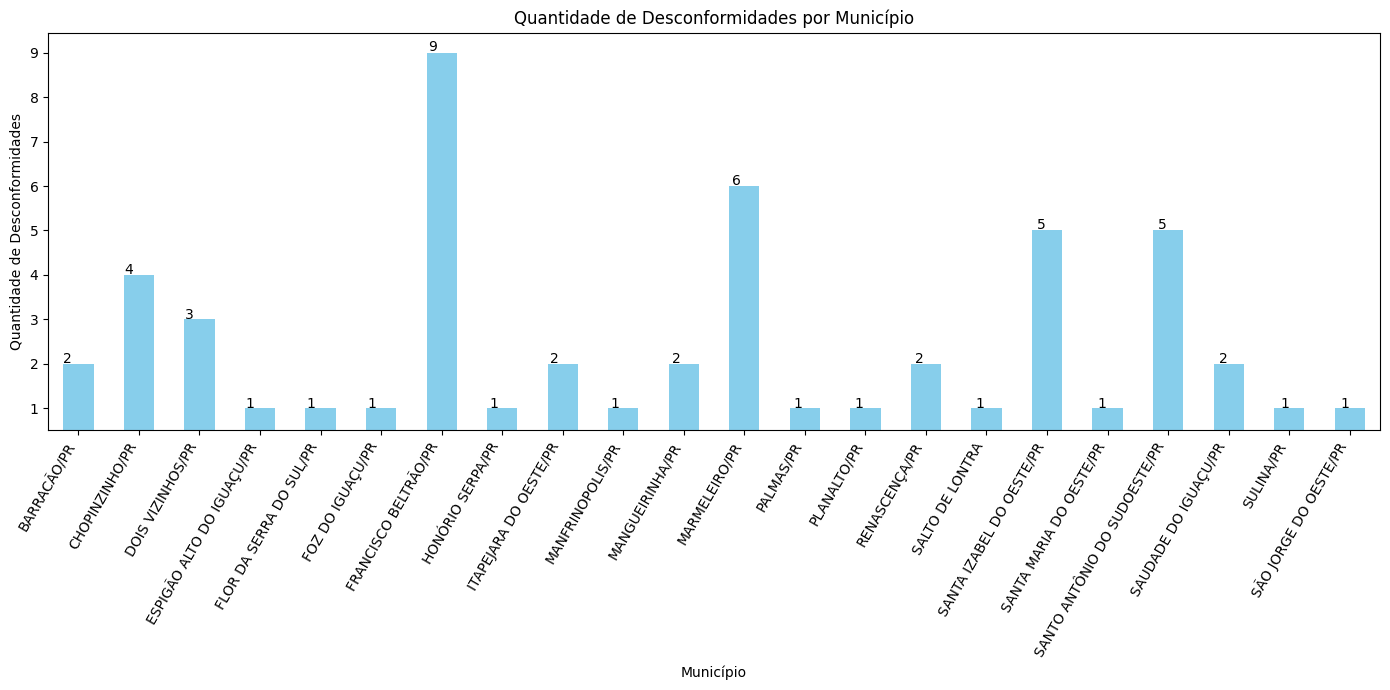

In [77]:
# Visualização de Desconformidades por Município com Ajustes
plt.figure(figsize=(14, 7))
ax = desconformidades_municipio_proc_adm.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Desconformidades por Município')
plt.xlabel('Município')
plt.ylabel('Quantidade de Desconformidades')

# Ajustar o limite inferior do eixo Y
ax.set_ylim(bottom=0.5)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [79]:
# Análise de Processos com Desconformidades
processos_desconformidades_pa_digit = pa_digit[(pa_digit['Desconformidades'].notna()) & (pa_digit['Desconformidades'] != 'N/C') & (pa_digit['Município'].notna()) & (pa_digit['Município'] != 'N/C')]

num_processos_desconformidades_pa_digit = len(processos_desconformidades_pa_digit)
print(f'Número de processos com desconformidades: {num_processos_desconformidades_pa_digit}')
desconformidades_contagem_pa_digit = processos_desconformidades_pa_digit['Desconformidades'].value_counts()
print(desconformidades_contagem_pa_digit)

# Agrupar por município, contar desconformidades e ordenar alfabeticamente
desconformidades_municipio_pa_digit = processos_desconformidades_pa_digit.groupby('Município').size().sort_index()


Número de processos com desconformidades: 3533
Desconformidades
N/C                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

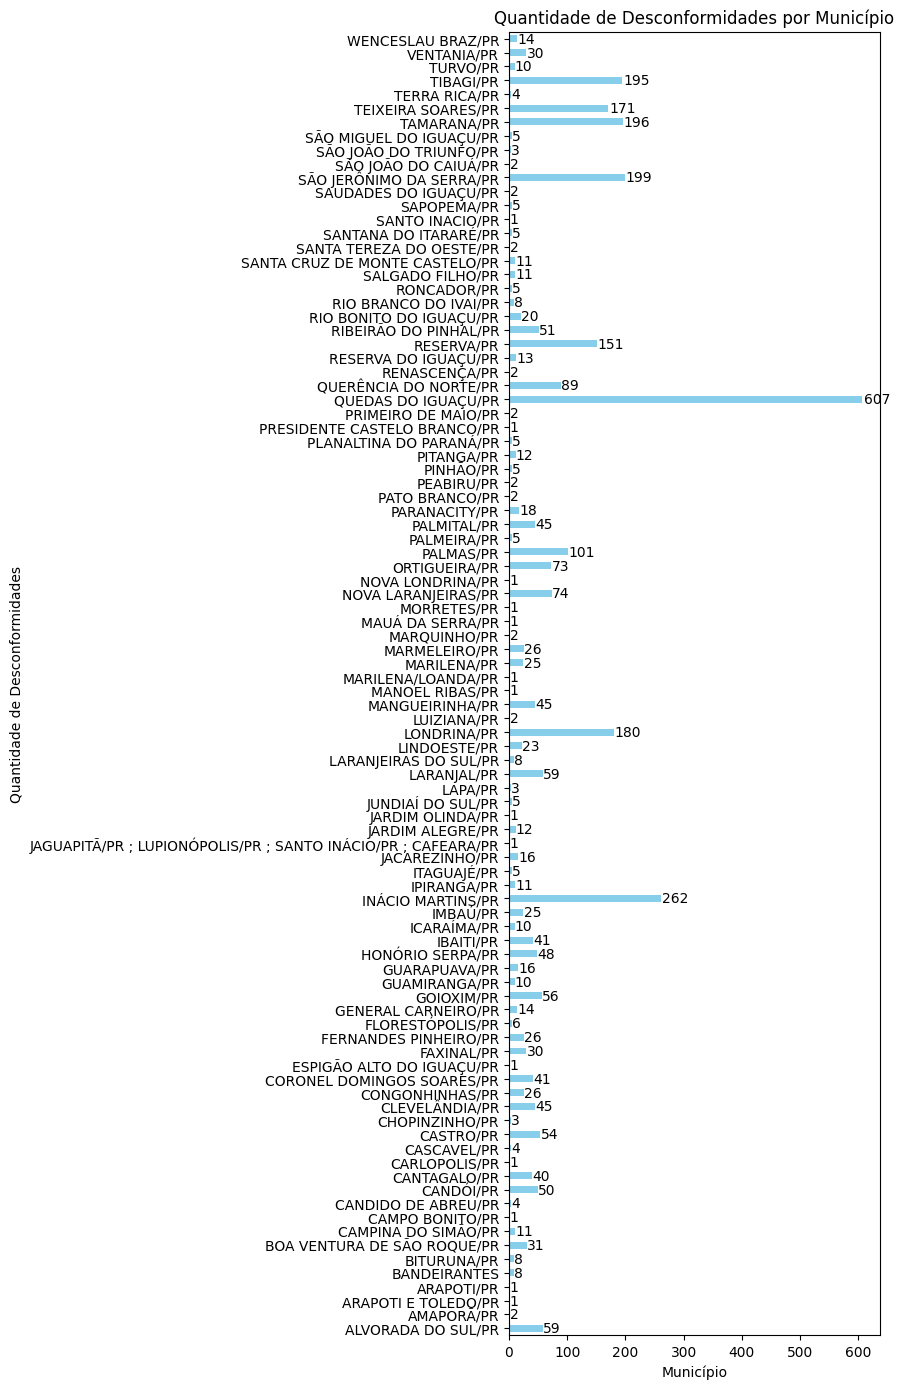

In [90]:
# Visualização de Desconformidades por Município com Ajustes
plt.figure(figsize=(9, 14))
ax = desconformidades_municipio_pa_digit.plot(kind='barh', color='skyblue')
plt.title('Quantidade de Desconformidades por Município')
plt.xlabel('Município')
plt.ylabel('Quantidade de Desconformidades')

# Ajustar o limite inferior do eixo Y
ax.set_ylim(bottom=0.5)

# Adicionar anotações em um gráfico de barras horizontais
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() + p.get_height() / 2), va='center')

plt.tight_layout()
plt.show()

Situação
INSERIDO NO SEI - CONFERIDO, AGUARDANDO AUTENTICAÇÃO E ASSINATURA    185
INSERIDO NO SEI - ALTERAR OU EDITAR INFORMAÇÕES                        3
AGUARDANDO CONFERÊNCIA                                                 1
Name: count, dtype: int64


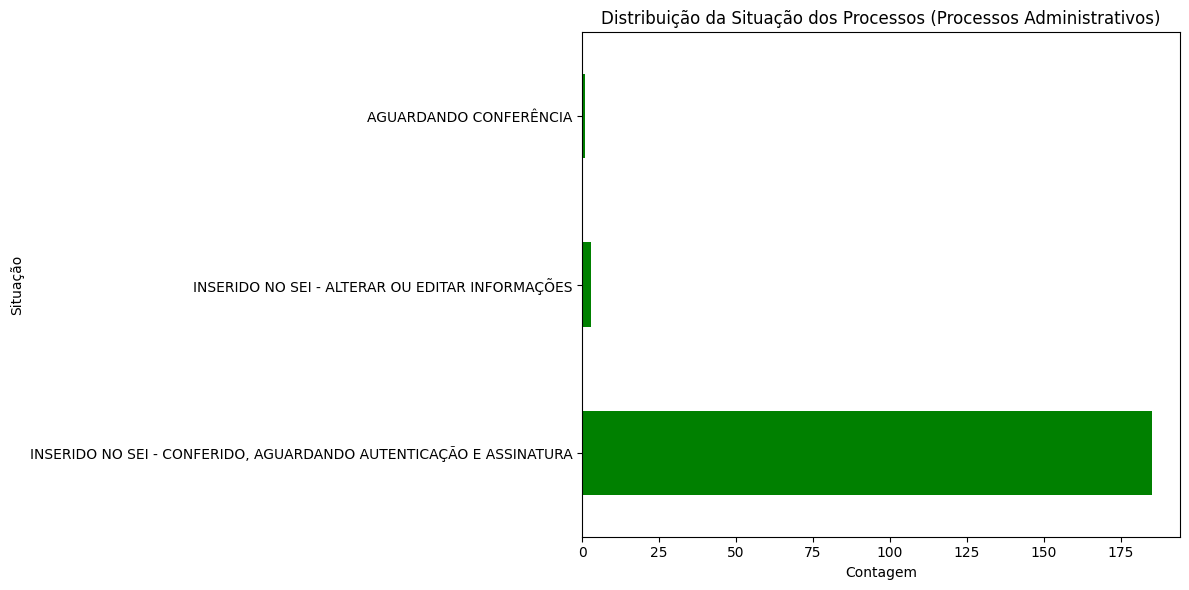

In [87]:
# Análise da Situação dos Processos
situacao_contagem = proc_adm['Situação'].value_counts()
print(situacao_contagem)

# Visualização da Situação dos Processos
plt.figure(figsize=(12, 6))
situacao_contagem.plot(kind='barh', color='green')
plt.title('Distribuição da Situação dos Processos (Processos Administrativos)')
plt.xlabel('Contagem')
plt.ylabel('Situação')
plt.tight_layout()
plt.show()

Situação
INSERIDO NO SEI - CONFERIDO, AGUARDANDO AUTENTICAÇÃO E ASSINATURA    4598
INSERIDO NO SEI - AGUARDANDO CONFERÊNCIA                              369
INSERIDO NO SEI - ASSINADO E AUTENTICADO                              211
INSERIDO NO SEI - ALTERAR OU EDITAR INFORMAÇÕES NO SEI                 54
INSERIDO NO SEI - Interrupção de acesso ao SEI                         23
Name: count, dtype: int64


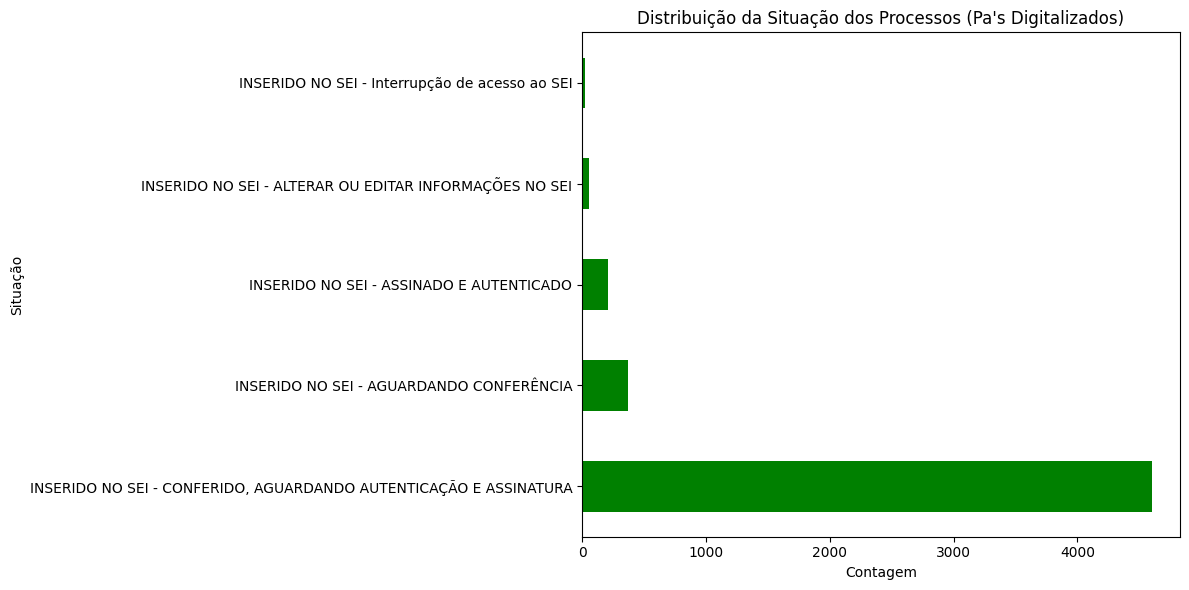

In [88]:
# Análise da Situação dos Processos
situacao_contagem = pa_digit['Situação'].value_counts()
print(situacao_contagem)

# Visualização da Situação dos Processos
plt.figure(figsize=(12, 6))
situacao_contagem.plot(kind='barh', color='green')
plt.title("Distribuição da Situação dos Processos (Pa's Digitalizados)")
plt.xlabel('Contagem')
plt.ylabel('Situação')
plt.tight_layout()
plt.show()

Município
AMPÉRE/PR                        6
BARRACÃO/PR                     12
BELA VISTA DA CAROBA/PR          1
BOA ESPERANÇA DO IGUAÇU          3
BOM JESUS DO SUL/PR              1
CAPANEMA/PR                      2
CHOPINZINHO/PR                  10
CORONEL VIVIDA/PR                2
CRUZEIRO DO IGUAÇU/PR            1
DOIS VIZINHOS/PR                 6
ENÉAS MARQUES/PR                 2
ESPIGÃO ALTO DO IGUAÇU/PR        1
FLOR DA SERRA DO SUL/PR          3
FOZ DO IGUAÇU/PR                 1
FRANCISCO BELTRÃO/PR            14
HONÓRIO SERPA/PR                 1
ITAPEJARA DO OESTE/PR            2
MANFRINOPOLIS/PR                 1
MANGUEIRINHA/PR                  3
MARINOPOLIS/PR                   1
MARMELEIRO/PR                   23
NOVA PRATA DO IGUAÇU/PR          3
PALMAS/PR                        2
PALMITAL/PR                      1
PATO BRANCO/PR                   1
PINHAL DE SÃO BENTO/PR           2
PLANALTO/PR                      5
PÉROLA D'OESTE/PR                2
REALEZA/PR

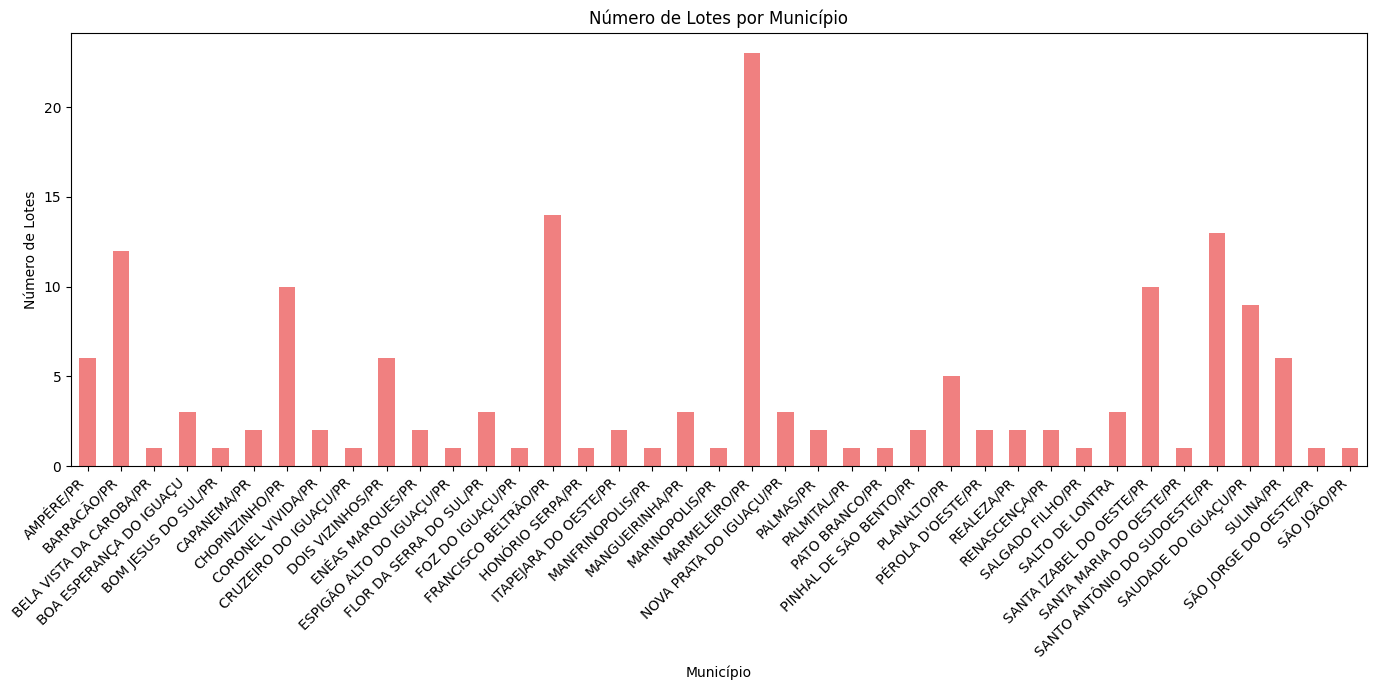

In [89]:
# Relacionar número de lotes com municípios
lotes_por_municipio = proc_adm.groupby('Município')['Lote/Parcela'].nunique()
print(lotes_por_municipio)
plt.figure(figsize=(14, 7))
lotes_por_municipio.plot(kind='bar', color='lightcoral')
plt.title('Número de Lotes por Município (Processos Administrativos)')
plt.xlabel('Município')
plt.ylabel('Número de Lotes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Município
ALTAMIRA DO PARANÁ/PR    31
ALVORADA DO SUL/PR       44
AMAPORÃ/PR                3
ARAPONGAS/PR              3
ARAPOTI E TOLEDO/PR       1
                         ..
TIBAGI/PR                35
TOLEDO/PR                 1
TURVO/PR                 20
VENTANIA/PR              26
WENCESLAU BRAZ/PR        14
Name: Lote/Parcela, Length: 101, dtype: int64


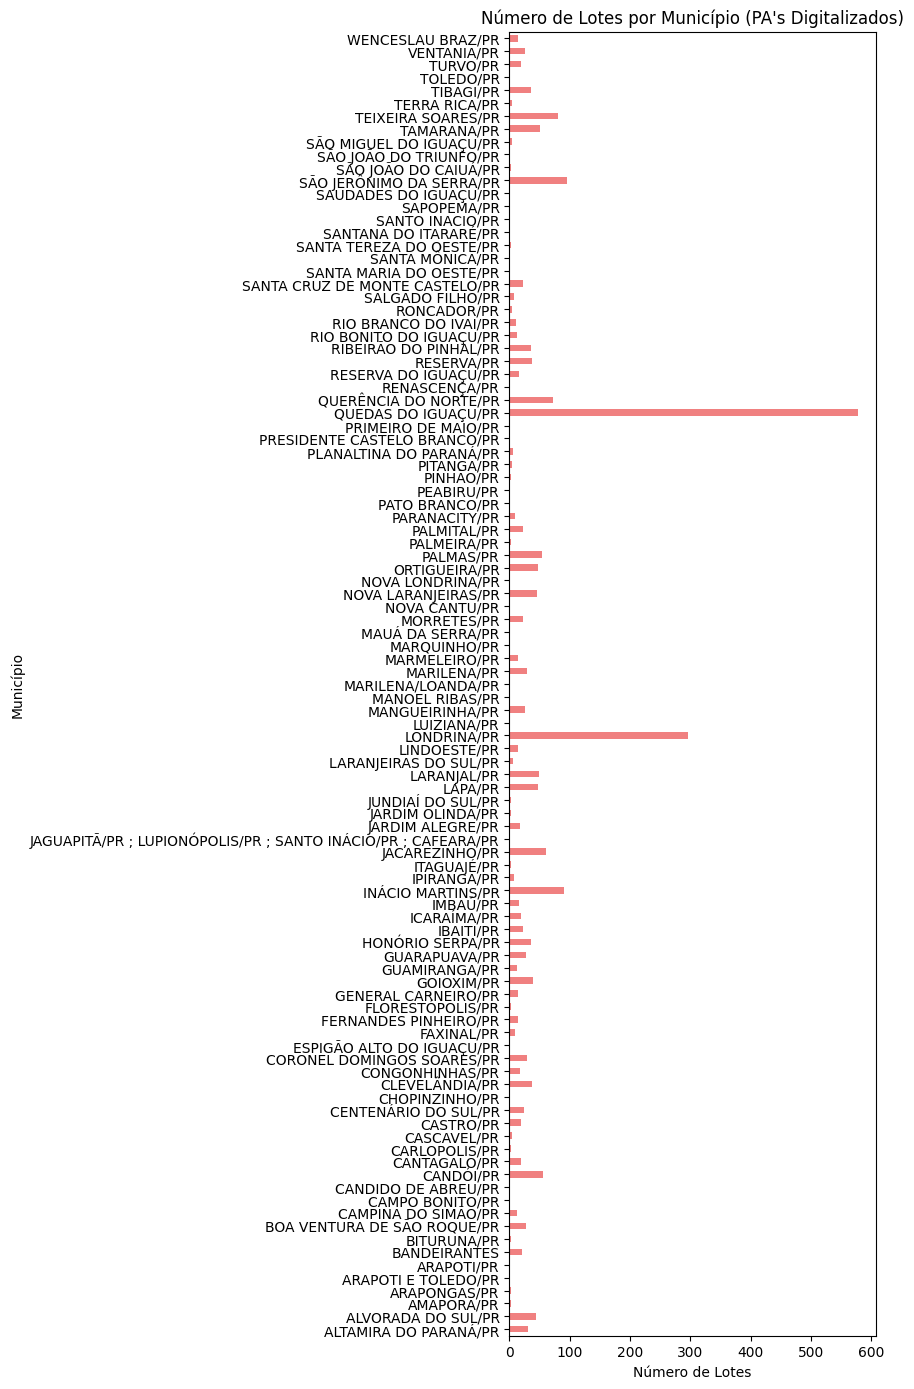

In [92]:
# Relacionar número de lotes com municípios
lotes_por_municipio = pa_digit.groupby('Município')['Lote/Parcela'].nunique()
print(lotes_por_municipio)
plt.figure(figsize=(9,14))
lotes_por_municipio.plot(kind='barh', color='lightcoral')
plt.title("Número de Lotes por Município (PA's Digitalizados)")
plt.xlabel('Número de Lotes')
plt.ylabel('Município')
plt.tight_layout()
plt.show()

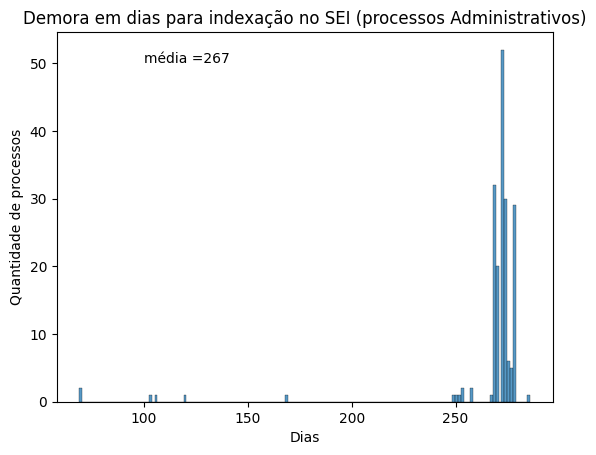

In [35]:
#plotando a relação entre a demora de dias para indexação e a quantidade de processos.
a = np.mean(proc_adm['demora indexação'])
sns.histplot(proc_adm['demora indexação'])
plt.title('Demora em dias para indexação no SEI (Processos Administrativos)')
plt.ylabel('Quantidade de processos')
plt.xlabel('Dias')
plt.text (100,50,'média ='+str(int(a)))
plt.show()

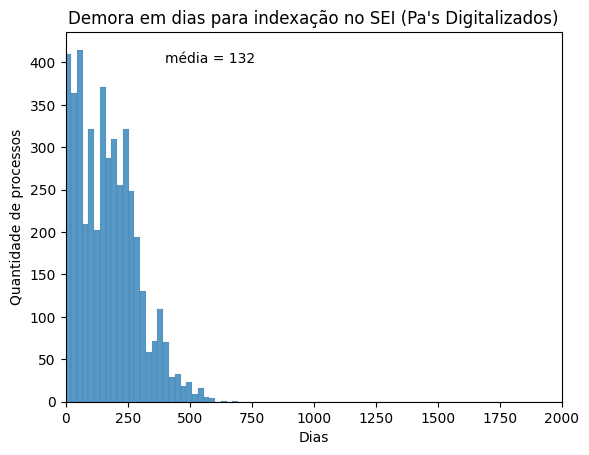

In [37]:
#plotando a relação entre a demora de dias para indexação e a quantidade de processos.
a = np.mean(pa_digit['demora indexação'])
sns.histplot(pa_digit['demora indexação'])
plt.title("Demora em dias para indexação no SEI (Pa's Digitalizados)")
plt.ylabel('Quantidade de processos')
plt.xlabel('Dias')
plt.xlim([0,2000])
plt.text (400,400,'média = '+str(int(a)))
plt.show()

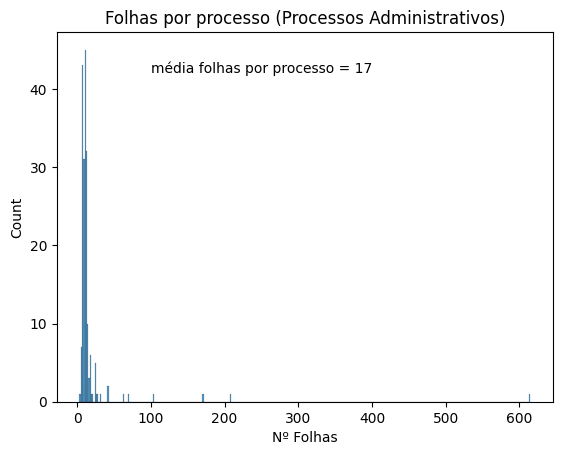

In [38]:
#plotando a relação entre a quantidade de folhas e a quantidade de processos.
a = proc_adm['Nº Folhas']
aa = np.mean(a)
sns.histplot(a)
plt.title('Folhas por processo (Processos Administrativos)')
plt.text (100,42,'média folhas por processo = '+str(int(aa)))
plt.show()

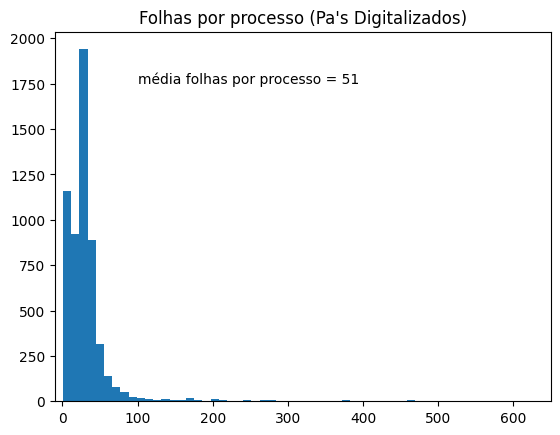

In [40]:
#plotando a relação entre a quantidade de folhas e a quantidade de processos.
b = pa_digit['Nº Folhas']
bb = np.mean(b)
plt.hist(b, bins=900)
plt.title("Folhas por processo (Pa's Digitalizados)")
plt.text (100,1750,'média folhas por processo = '+str(int(bb)))
plt.xlim([-10,650])
plt.show()

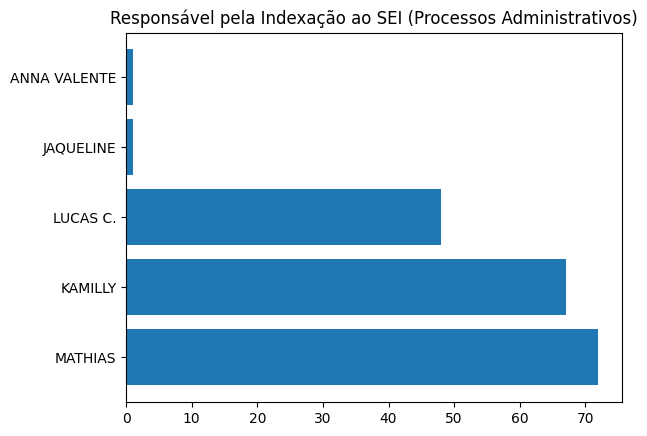

In [50]:
#plotando a quantidade de documentos indexado no Sei por responsável:
proc_adm_list =proc_adm['Responsável pela Indexação ao SEI'].value_counts()
plt.barh(proc_adm_list.index, proc_adm_list)
plt.title('Responsável pela Indexação ao SEI (Processos Administrativos)')
plt.show()

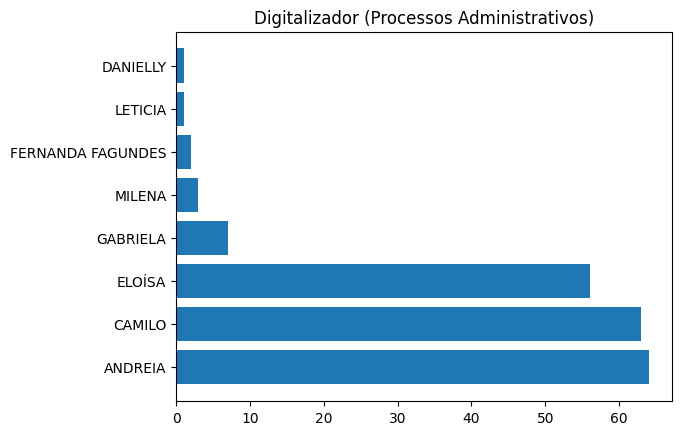

In [51]:
#plotando a quantidade de documentos digitalizados por responsável:
proc_adm_list =proc_adm['Digitalizador'].value_counts()
plt.barh(proc_adm_list.index, proc_adm_list)
plt.title('Digitalizador (Processos Administrativos)')
plt.show()

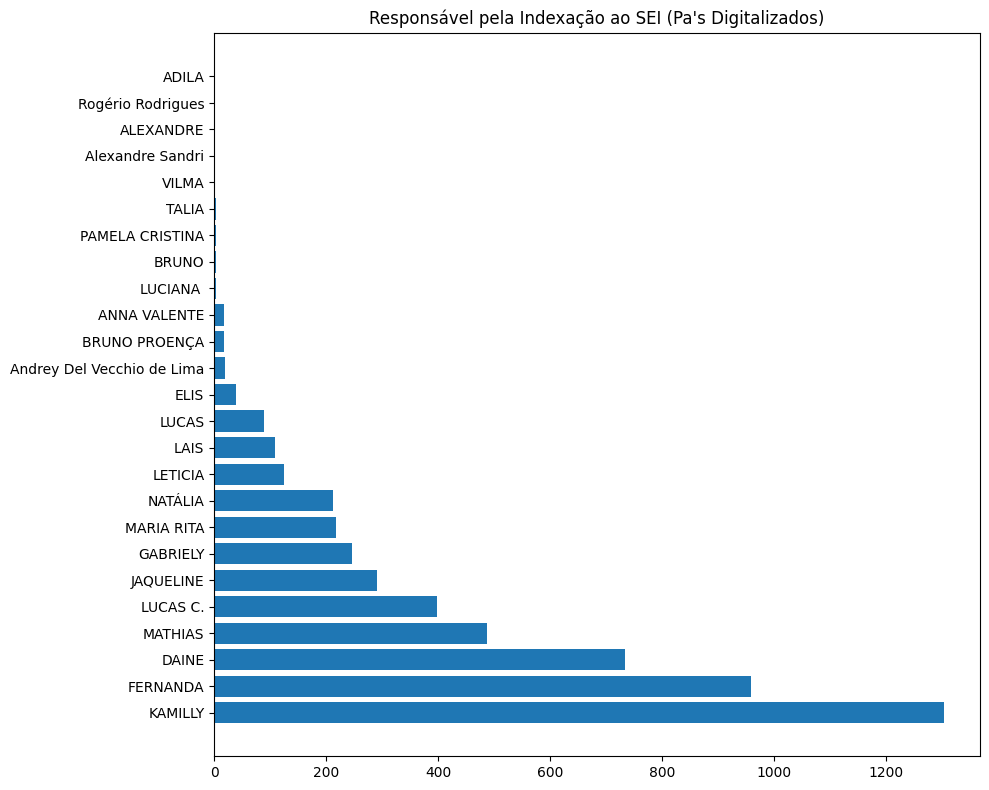

In [45]:
#plotando a quantidade de documentos indexado no Sei por responsável:
pa_digit_list =pa_digit['Responsável pela Indexação ao SEI'].value_counts()
plt.figure(figsize=(10,8))
plt.barh(pa_digit_list.index, pa_digit_list)
plt.title("Responsável pela Indexação ao SEI (Pa's Digitalizados)")
plt.tight_layout()
plt.show()

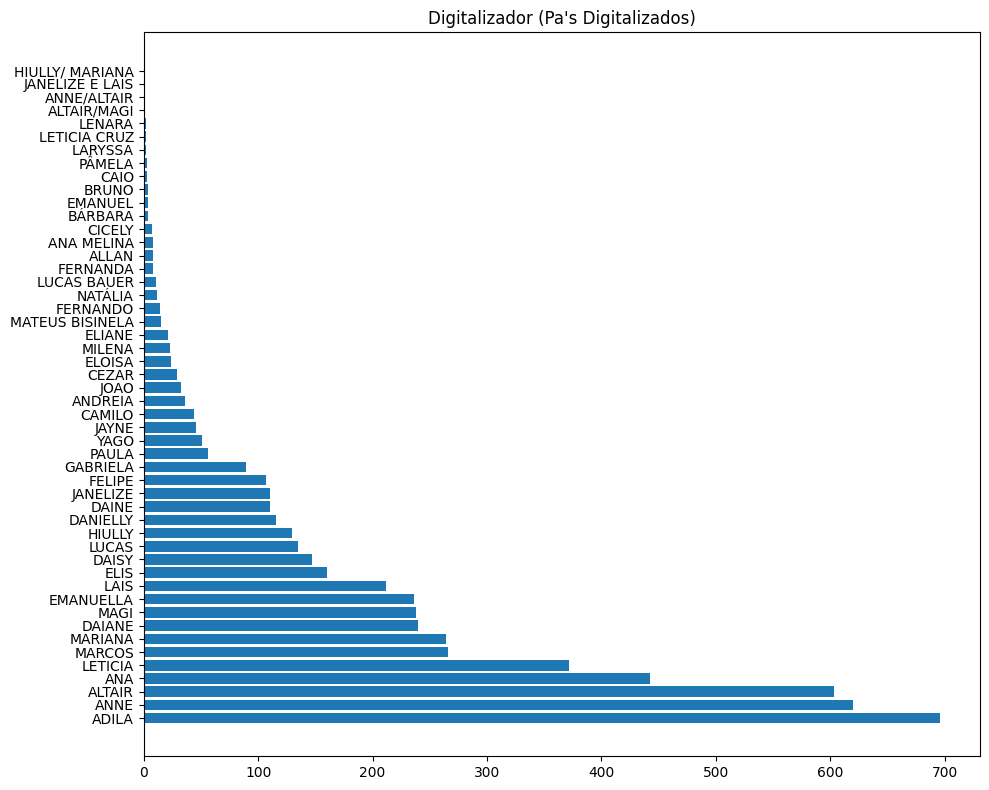

In [48]:
#plotando a quantidade de documentos digitalizados por responsável:
pa_digit_list = pa_digit['Digitalizador'].value_counts()
plt.figure(figsize=(10,8))
plt.barh(pa_digit_list.index, pa_digit_list)
plt.title("Digitalizador (Pa's Digitalizados)")
plt.tight_layout()
plt.show()

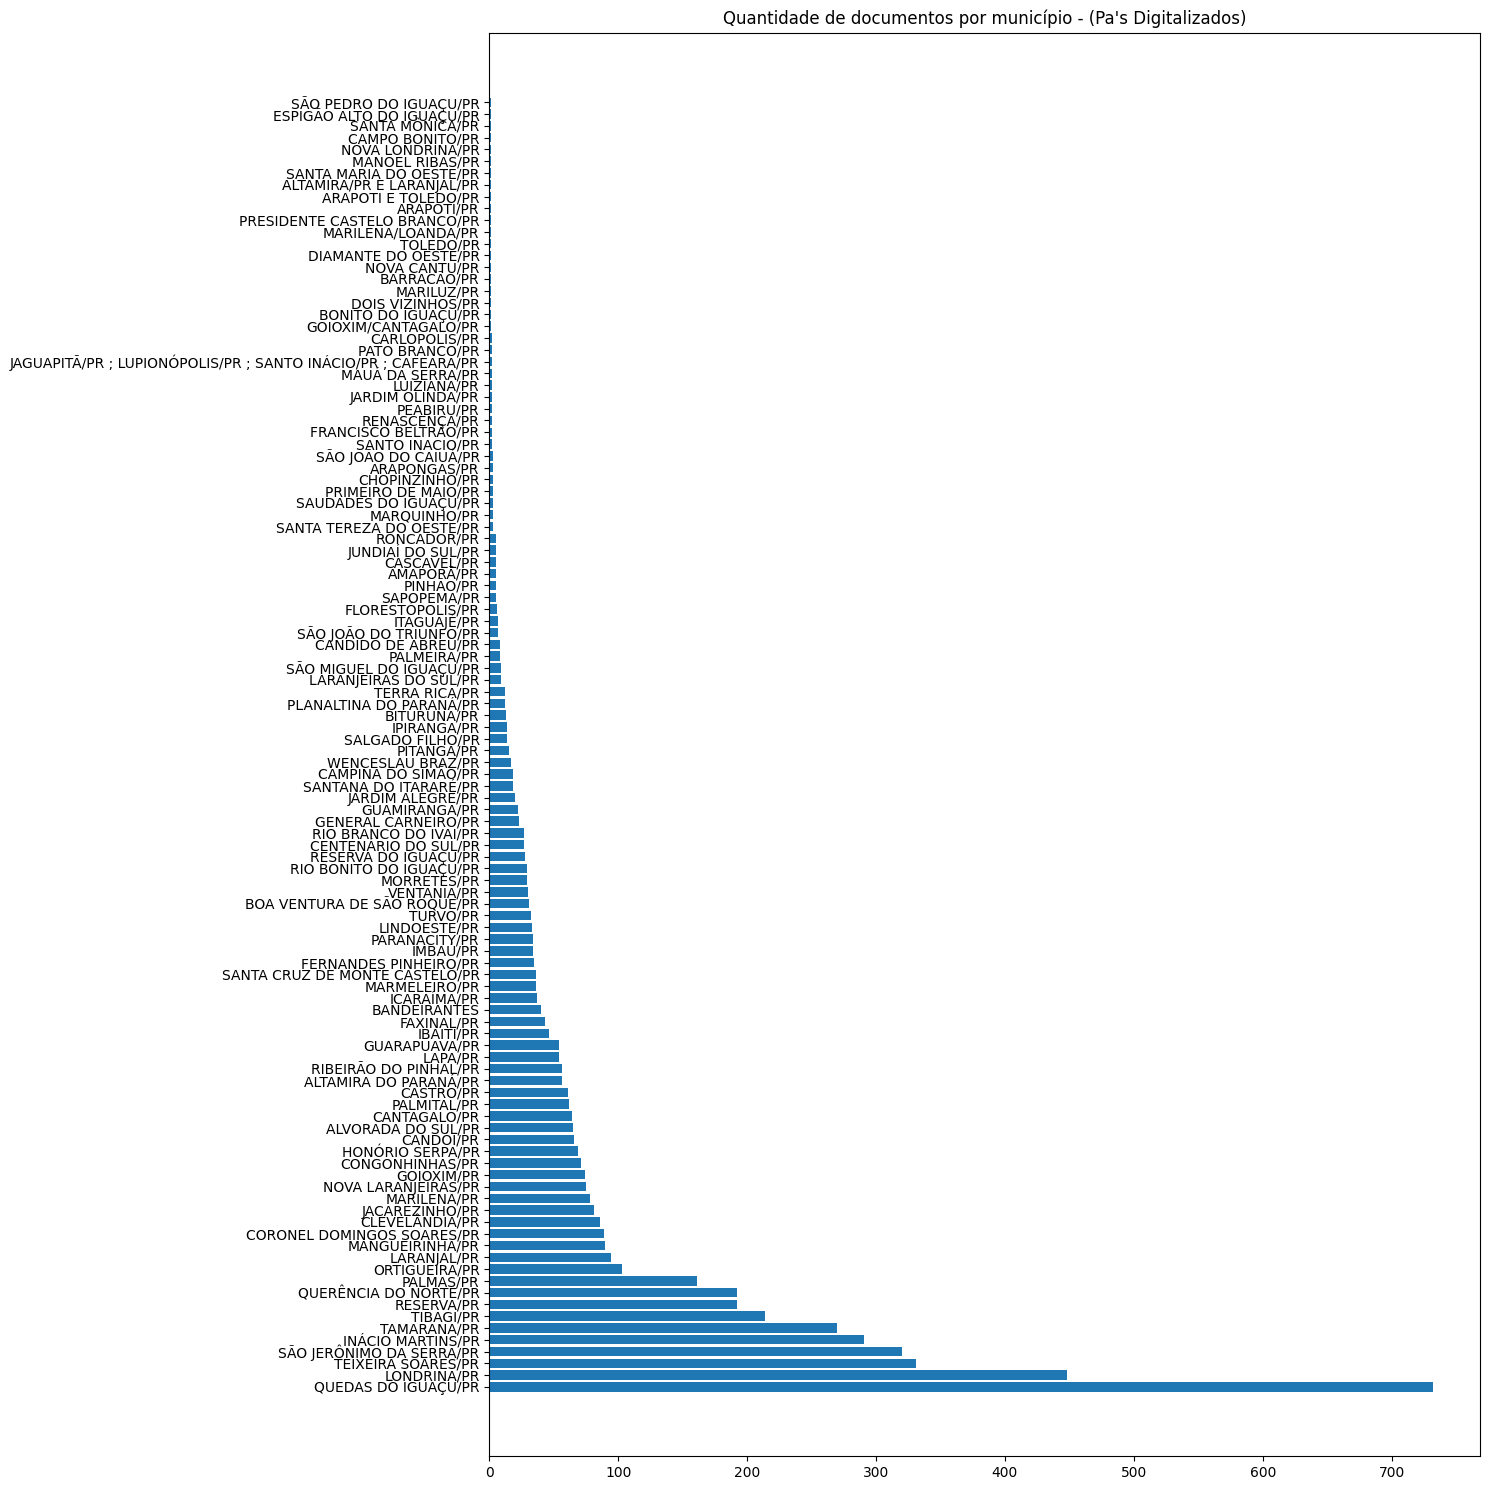

In [43]:
#plotando a quantidade de documentos por município:
pa_digit_list =pa_digit['Município'].value_counts()
plt.figure(figsize=(15,15))
plt.barh(pa_digit_list.index, pa_digit_list)
plt.title("Quantidade de documentos por município - (Pa's Digitalizados)")
plt.tight_layout()
plt.show()

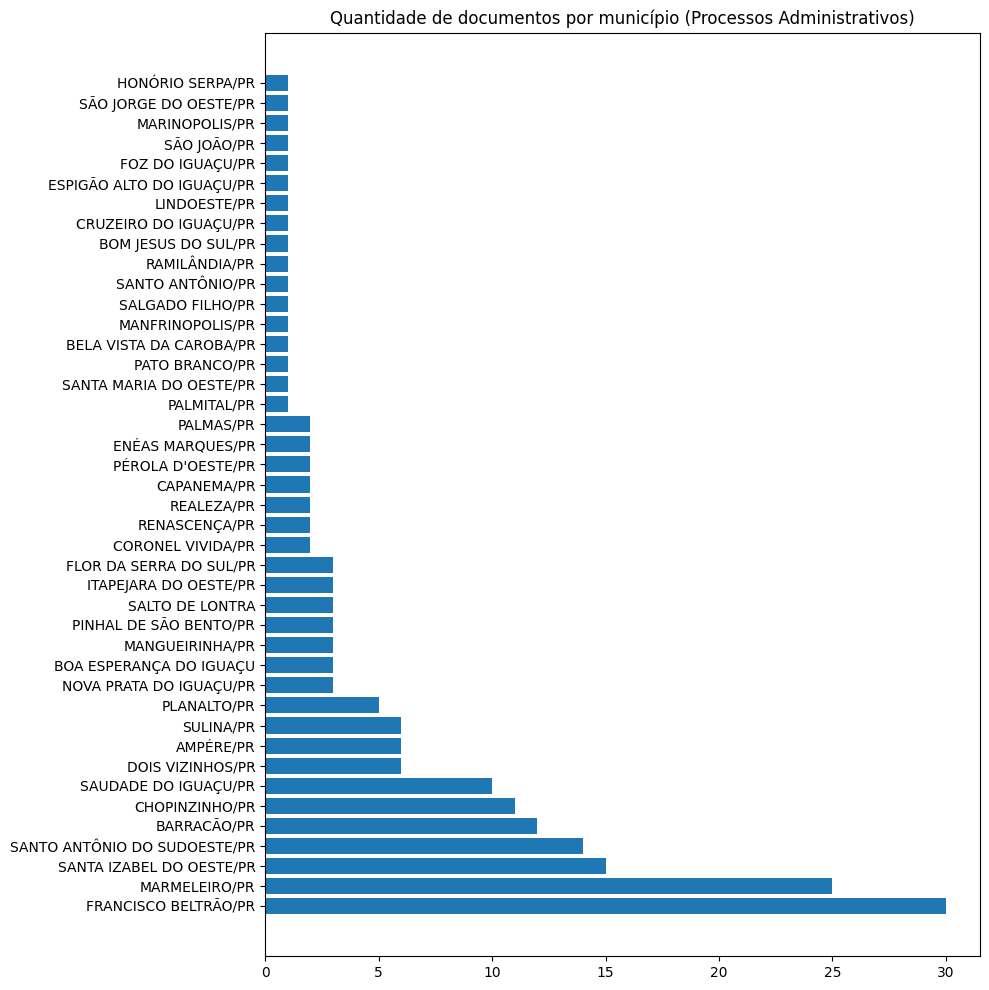

In [62]:
#plotando a quantidade de documentos por município:
proc_adm_list =proc_adm['Município'].value_counts()
plt.figure(figsize=(10,10))
plt.barh(proc_adm_list.index, proc_adm_list)
plt.title('Quantidade de documentos por município (Processos Administrativos)')
plt.tight_layout()
plt.show()

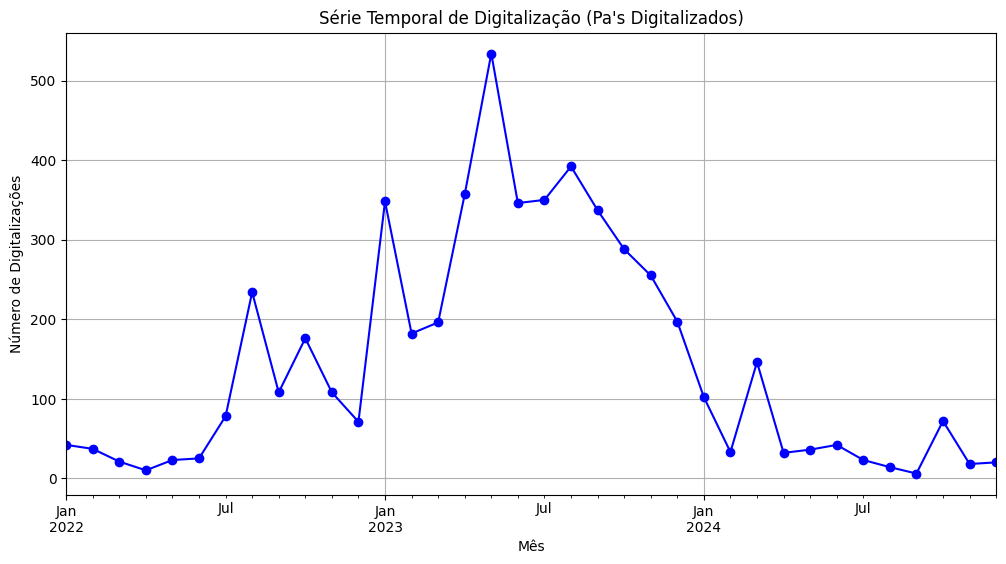

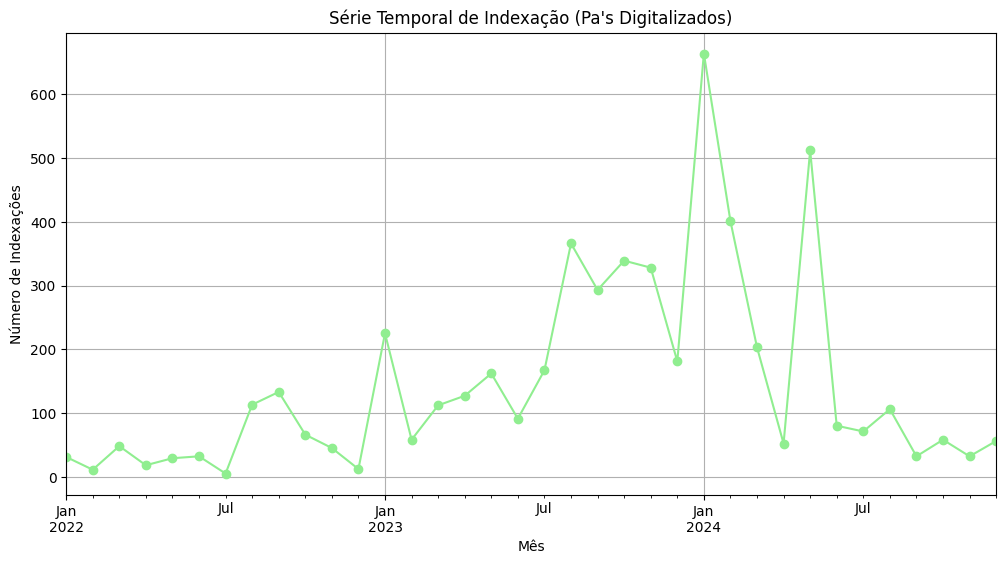

In [71]:
# Remover entradas com datas nulas
pa_digit = pa_digit.dropna(subset=['Data da Digitalização', 'Data da Indexação ao SEI'])

# Agrupar por mês
digitalizacao_por_mes = pa_digit['Data da Digitalização'].groupby(pa_digit['Data da Digitalização'].dt.to_period('M')).count()
indexacao_por_mes = pa_digit['Data da Indexação ao SEI'].groupby(pa_digit['Data da Indexação ao SEI'].dt.to_period('M')).count()

# Gráfico da Série Temporal de Digitalização
plt.figure(figsize=(12, 6))
digitalizacao_por_mes.plot(kind='line', marker='o', color='blue')
plt.title("Série Temporal de Digitalização (Pa's Digitalizados)")
plt.xlabel('Mês')
plt.ylabel('Número de Digitalizações')
plt.grid(True)
plt.show()

# Gráfico da Série Temporal de Indexação
plt.figure(figsize=(12, 6))
indexacao_por_mes.plot(kind='line', marker='o', color='lightgreen')
plt.title("Série Temporal de Indexação (Pa's Digitalizados)")
plt.xlabel('Mês')
plt.ylabel('Número de Indexações')
plt.grid(True)
plt.show()

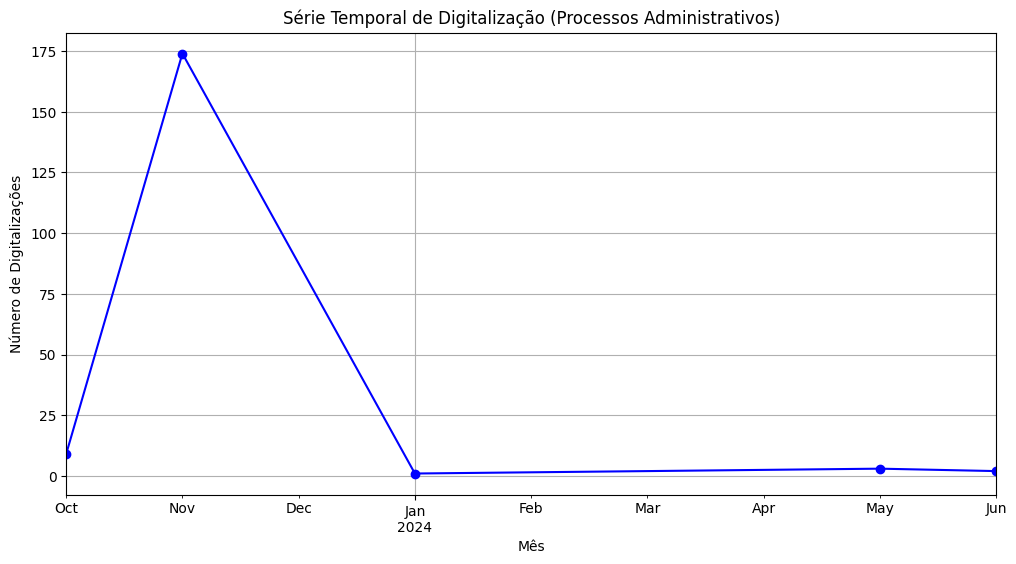

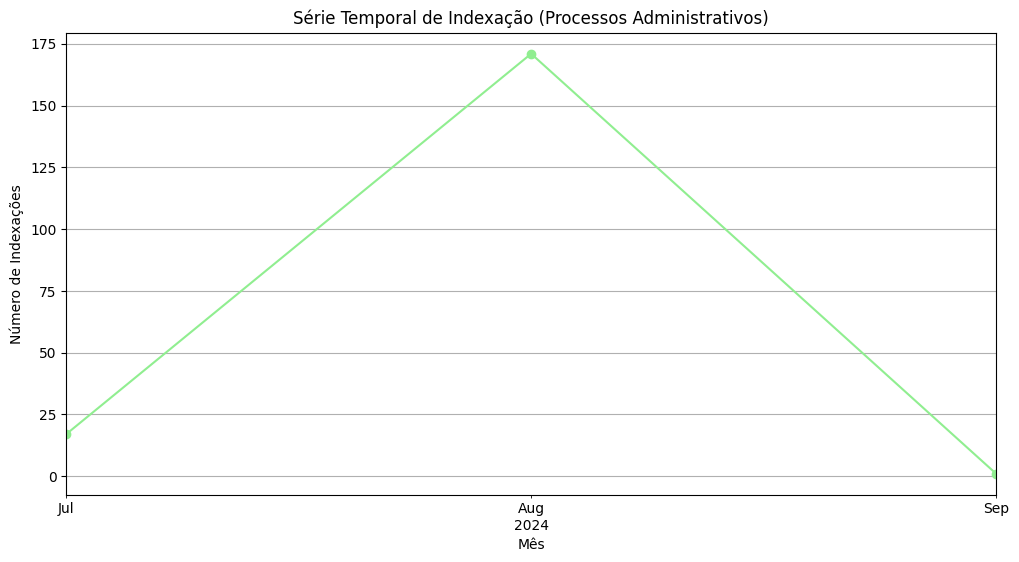

In [69]:
# Remover entradas com datas nulas
proc_adm = proc_adm.dropna(subset=['Data da Digitalização', 'Data da Indexação ao SEI'])

# Agrupar por mês
digitalizacao_por_mes = proc_adm['Data da Digitalização'].groupby(proc_adm['Data da Digitalização'].dt.to_period('M')).count()
indexacao_por_mes = proc_adm['Data da Indexação ao SEI'].groupby(proc_adm['Data da Indexação ao SEI'].dt.to_period('M')).count()

# Gráfico da Série Temporal de Digitalização
plt.figure(figsize=(12, 6))
digitalizacao_por_mes.plot(kind='line', marker='o', color='blue')
plt.title('Série Temporal de Digitalização (Processos Administrativos)')
plt.xlabel('Mês')
plt.ylabel('Número de Digitalizações')
plt.grid(True)
plt.show()

# Gráfico da Série Temporal de Indexação
plt.figure(figsize=(12, 6))
indexacao_por_mes.plot(kind='line', marker='o', color='lightgreen')
plt.title('Série Temporal de Indexação (Processos Administrativos)')
plt.xlabel('Mês')
plt.ylabel('Número de Indexações')
plt.grid(True)
plt.show()